**Q.1: Import data and check null values, column info, and descriptive statistics of the data.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
data = pd.read_csv('Instagram-Reach.csv')

# Display the first few rows
print("First few rows:")
print(data.head())


First few rows:
                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [ ]:
# Display the last few rows
print("Last few rows:")
print(data.tail())

Last few rows:
                    Date  Instagram reach
360  2023-03-27T00:00:00            15622
361  2023-03-28T00:00:00            18645
362  2023-03-29T00:00:00            41238
363  2023-03-30T00:00:00            50490
364  2023-03-31T00:00:00            22014


In [ ]:
# Check for null values
print("Null value check:")
print(data.isnull().sum())

Null value check:
Date               0
Instagram reach    0
dtype: int64


In [ ]:
# Check column info
print("Column Info:")
print(data.info())

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


In [ ]:
# Descriptive statistics
print("Descriptive statistics:")
print(data.describe())

Descriptive statistics:
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


**Q.2: You can convert the Date column into datetime datatype to move forward.**

In [ ]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as index
data.set_index('Date', inplace=True)

# Verify changes
print(data.head())

            Instagram reach
Date                       
2022-04-01             7620
2022-04-02            12859
2022-04-03            16008
2022-04-04            24349
2022-04-05            20532


# **Analyzing Reach**

**Q.3: Analyze the trend of Instagram reach over time using a line chart**

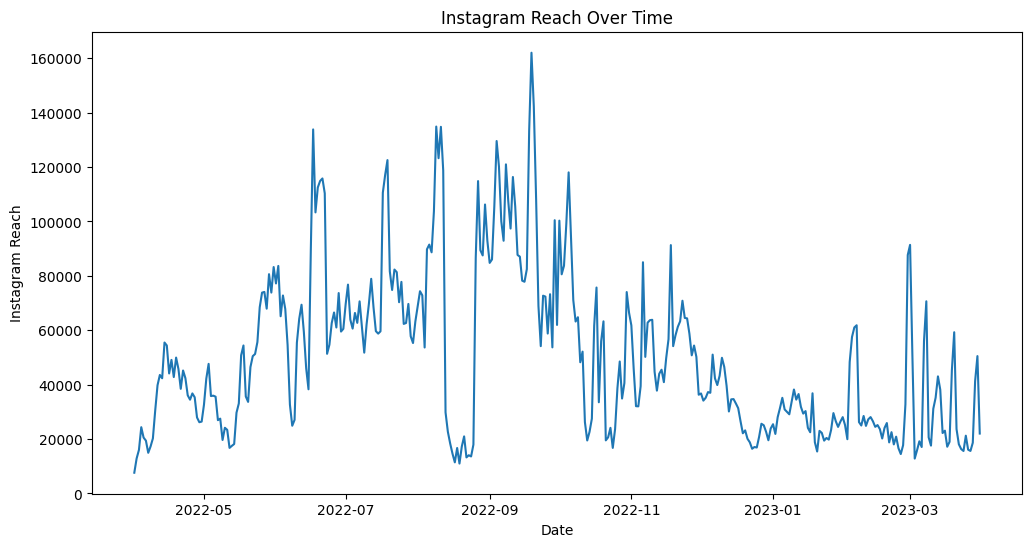

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Instagram reach'])
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.show()

**Q.4: Analyze Instagram reach for each day using a bar chart.**

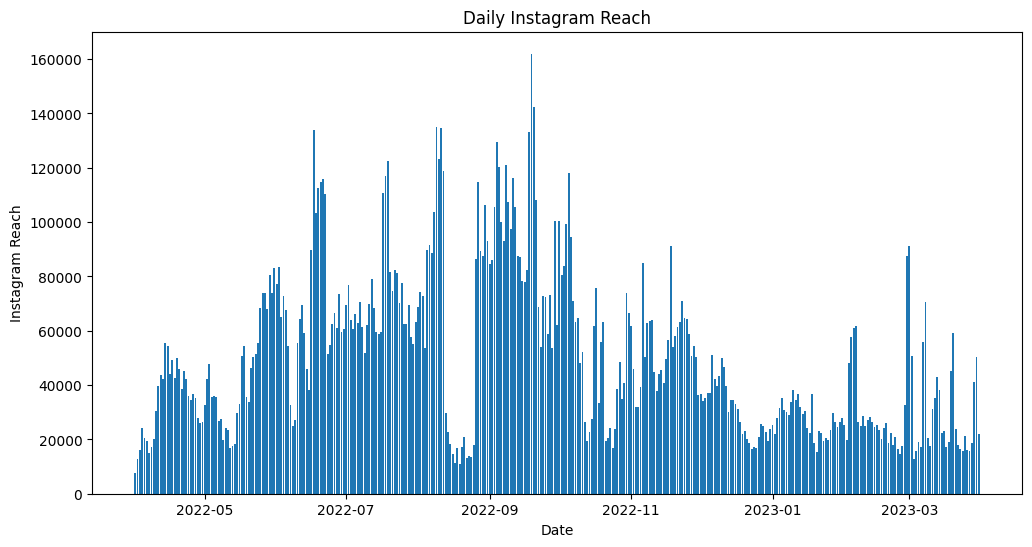

In [ ]:
daily_reach = data.resample('D').sum()
plt.figure(figsize=(12, 6))
plt.bar(daily_reach.index, daily_reach['Instagram reach'])
plt.title('Daily Instagram Reach')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.show()

**Q.5: Analyze the distribution of Instagram reach using a box plot.**

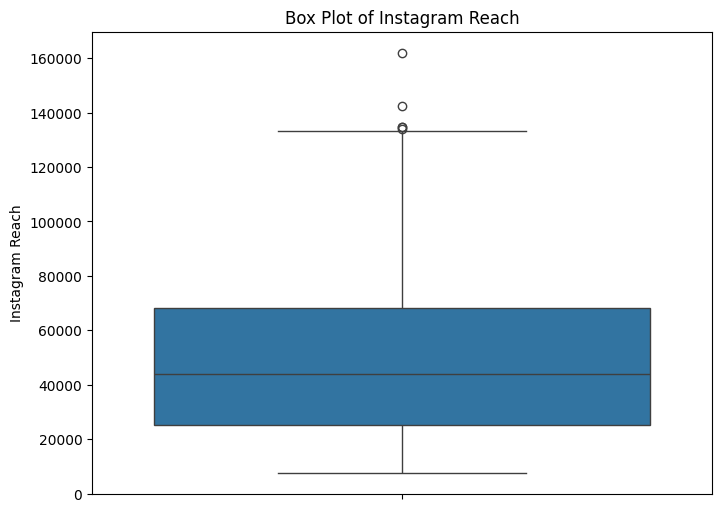

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Instagram reach'])
plt.title('Box Plot of Instagram Reach')
plt.ylabel('Instagram Reach')
plt.show()

**Q.5:Now create a day column and analyze reach based on the days of the week. To create a day column, you can use the python method to extract the day of the week from the Date column.**

**Q.6:Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day.**

In [ ]:
# Creating a day column
data['Day'] = data.index.day_name()

# Analyzing reach based on days of the week
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std'])
print(day_stats)

                   mean   median           std
Day                                           
Friday     46666.849057  35574.0  29856.943036
Monday     52621.692308  46853.0  32296.071347
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
Thursday   48570.923077  39150.0  28623.220625
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685


**Q.7: Now create a bar chart to visualize the reach for each day of the week.**

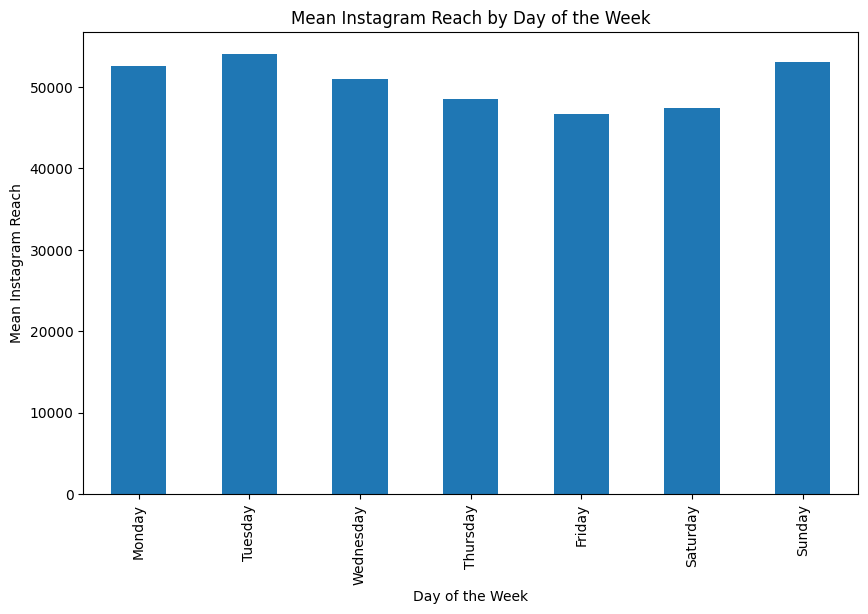

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mean_reach = data.groupby('Day')['Instagram reach'].mean().reindex(day_order)

plt.figure(figsize=(10, 6))
day_mean_reach.plot(kind='bar')
plt.title('Mean Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Instagram Reach')
plt.show()

**Q.8: Check the Trends and Seasonal patterns of Instagram reach.**

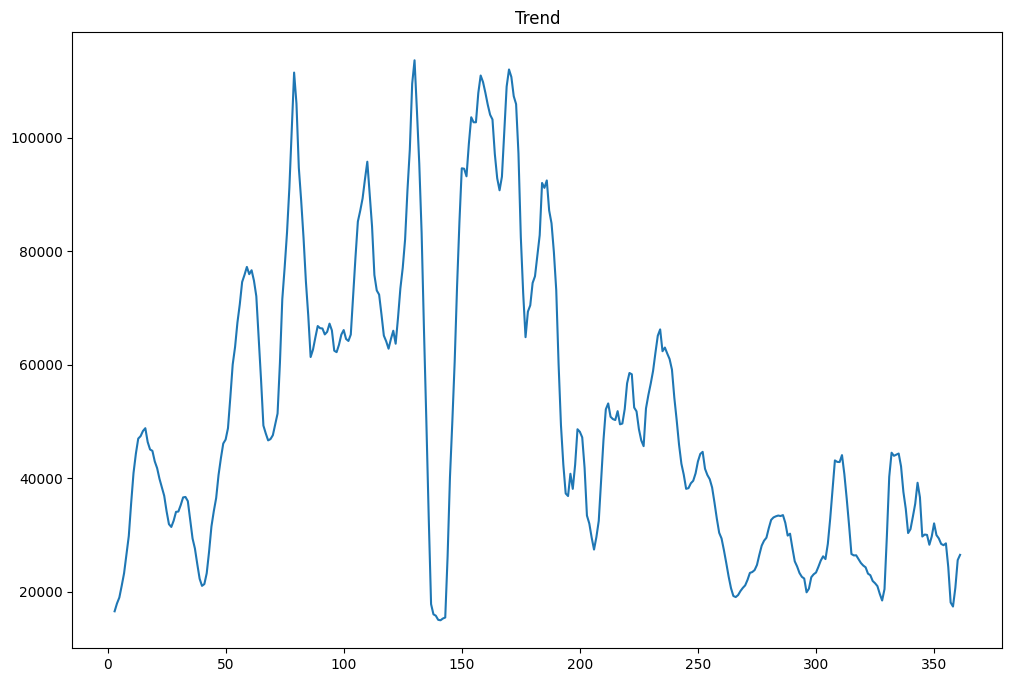

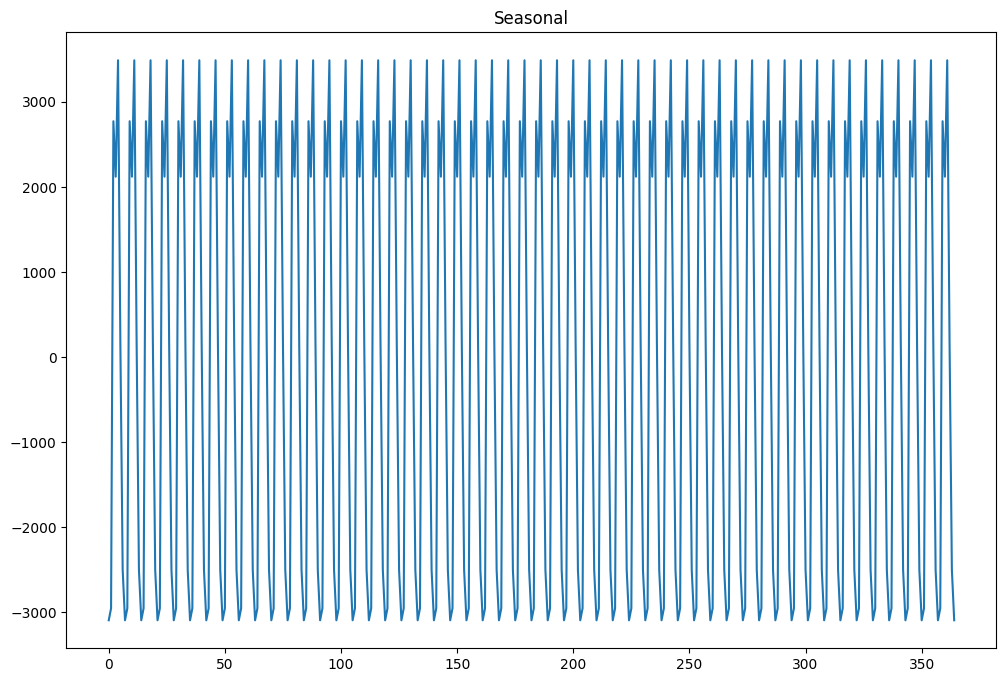

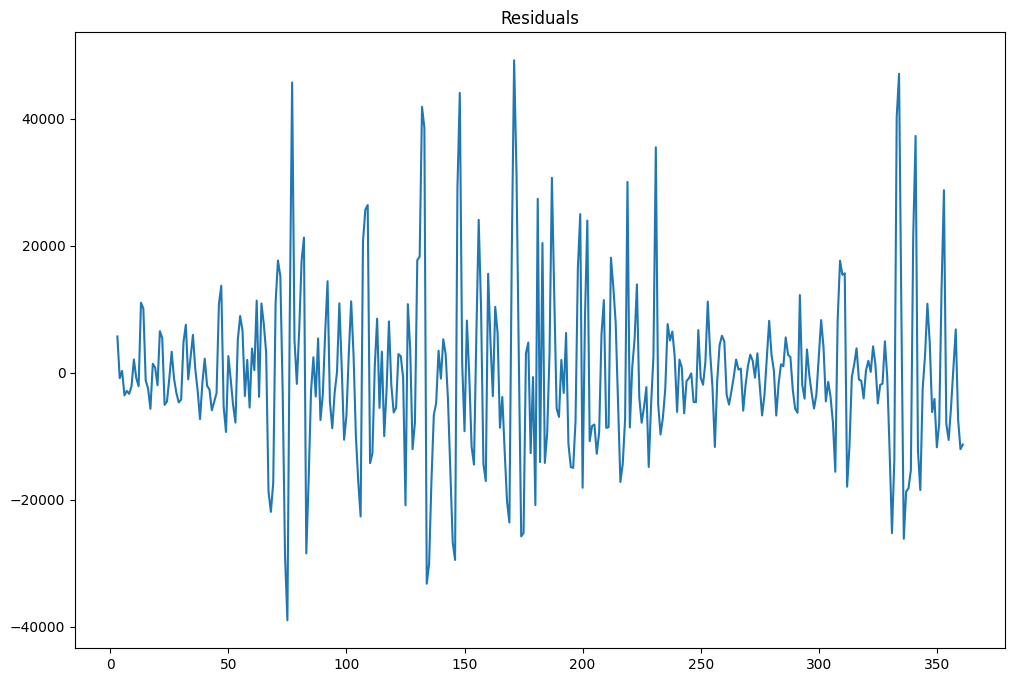

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to check trends and seasonal patterns
decomposition = seasonal_decompose(data['Instagram reach'], model='additive', period=7)

plt.figure(figsize=(12, 8))
decomposition.trend.plot(title='Trend')
plt.show()

plt.figure(figsize=(12, 8))
decomposition.seasonal.plot(title='Seasonal')
plt.show()

plt.figure(figsize=(12, 8))
decomposition.resid.plot(title='Residuals')
plt.show()